In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from maxent_gan.utils.general_utils import ROOT_DIR

sns.set_theme()


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22 #18

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("lines", linewidth=3)
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title



2022-05-27 12:01:06.995254: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def ema(s, n):
    """
    returns an n period exponential moving average for
    the time series s

    s is a list ordered from oldest (index 0) to most
    recent (index -1)
    n is an integer

    returns a numeric array of the exponential
    moving average
    """
    s = np.array(s)
    ema = []
    j = 1

    #get n sma first and calculate the next n period ema
    sma = sum(s[:n]) / n
    multiplier = 2 / float(1 + n)
    ema.append(sma)

    #EMA(current) = ( (Price(current) - EMA(prev) ) x Multiplier) + EMA(prev)
    ema.append(( (s[n] - sma) * multiplier) + sma)

    #now calculate the rest of the values
    for i in s[n+1:]:
        tmp = ( (i - ema[j]) * multiplier) + ema[j]
        j = j + 1
        ema.append(tmp)

    return ema

In [3]:
seeds = [44, 45, 46]
exp_paths = ['../log/dumb_feature_PriorTarget_train/dcgan_0.01_44', 
#'../log/dumb_feature_DiscriminatorTarget_train/dcgan_0.01_44', 
#'../log/cmd_feature_PriorTarget_train/dcgan_iw_0.01_44', 
# '../log/cmd_resnet34_feature_DiscriminatorTarget_train/dcgan_0.01_test_44'
'../log/cmd_resnet34_feature_DiscriminatorTarget_train/dcgan_0.01_flow_44',
# '../log/cmd_feature_DiscriminatorTarget_train/dcgan_0.01_44',
#'../log/cmd_resnet34_feature_PriorTarget_train/dcgan_0.01_44'
]
names = [r'$GAN$', 
#r'$D$',
#r'$SOUL_{CMD-3}$', 
r'$SOUL_{CMD-3} ~(ResNet)$',
# r'$SOUL_{CMD-1} ~(ResNet)$',
#r'$GAN-SOUL_{CMD-3}$',
]
colors = ['g', 
#'y',
#'r', 
'b']

[154.74739811  81.66639     71.32495113  59.80231905  50.98811685
  50.29050175  48.38318511  45.55311507  44.94137414  41.38207688
  42.22460541  40.81809039  36.28711377  40.53018128  36.99683355
  37.18331279  37.82304455  36.8645722   35.9235376   36.32404915
  35.02501426  35.9887333   35.42506908  36.24622379  33.61184434
  35.22418776  32.11528966  34.14952298  33.84596529  34.92621517
  35.62012179  36.075251    33.7705844   33.4201177   35.56814464
  35.82436876  32.45933151  34.51161836  33.35859764  33.39386075
  33.91404833]
[166.10916887  64.54836857  60.44217844  55.70976138  46.53892785
  46.11934308  43.24428122  47.5548194   42.01910007  39.0491336
  39.77849178  38.8290215   34.88149282  38.26601696  35.45901143
  35.51363593  34.76351041  34.94770091  35.50448464  33.43707529
  36.45484664  34.16246011  34.39752273  33.48339467  32.91637371
  33.3657534   32.28513308  32.55677931  33.10675432  33.80331672
  32.53284171  42.24955939  36.7121253   32.3127057   33.10515

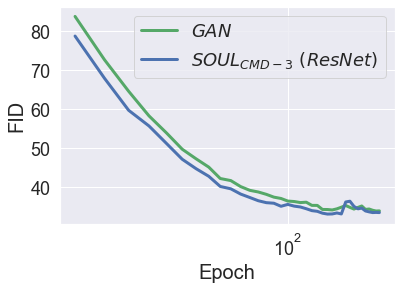

In [4]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path, 'fid.txt'))
    n = 5 #1 #10 #11
    print(fids)
    fids = ema(fids, n)
    start = 0 #3#0 #7
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('FID')
plt.xlabel('Epoch')
plt.xscale('log', base=10)

[2.87234521 3.98596001 4.44148064 4.57397318 4.88163805 4.91236544
 5.03580284 5.31859255 5.37352419 5.40694475 5.19935608 5.34414673
 5.48569822 5.34032822 5.53108168 5.52949381 5.55942917 5.64075613
 5.47968864 5.56696177 5.56672764 5.47275448 5.52889585 5.4758873
 5.46471262 5.52268648 5.72580194 5.68767071 5.67211533 5.4878912
 5.43729258 5.47976017 5.46033478 5.59823608 5.52014732 5.33587837
 5.64269066 5.49547625 5.44804192 5.69882488 5.53712416]
[3.34555173 4.28797102 4.72695923 4.72617483 5.19724226 5.07237005
 5.26999092 5.45840836 5.67269945 5.63787603 5.59308958 5.4881897
 5.70378637 5.40878344 5.73391438 5.77380514 5.76171255 5.57653046
 5.72799873 5.85822201 5.51841545 5.72849131 5.65931225 5.64239931
 6.05298424 5.75243521 5.96803236 5.98924875 5.86140442 5.79130697
 5.59438562 6.18606377 5.66842365 5.87100363 5.91515017 5.71796322
 6.08459044 5.9269352  5.83932972 5.75415659 5.8163805 ]


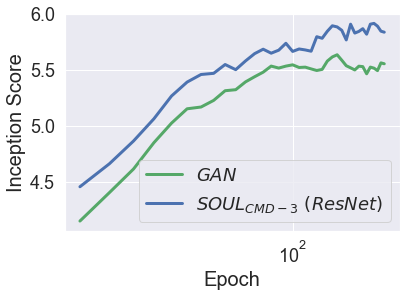

In [5]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path, 'inception_score.txt'))
    n = 5 #1 #1 #10 #11
    print(fids)
    fids = ema(fids, n)
    start = 0 #3#0 #7
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('Inception Score')
plt.xlabel('Epoch')
plt.xscale('log', base=10)

In [6]:
# for name, color, path in zip(names, colors, exp_paths):
#     fids = np.loadtxt(Path(path, 'weight_norm.txt'))
#     n = 1#1 #1 #10 #11
#     print(fids)
#     fids = ema(fids, n)
#     start = 0 #3#0 #7
#     fids = fids[start:]
#     plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
# plt.legend()
# plt.ylabel('Inception Score')
# plt.xlabel('Epoch')
# # plt.xscale('log', base=10)

[150.52626427  75.61591503  68.89197335  56.26846986  58.55444547
  49.1163651   47.39116705  44.64814388  43.70482817  43.00980797
  42.21462907  39.04234811  41.22503819  40.81857991  40.66796727
  37.99359352  37.52772773  36.7620748   37.47945826  37.10477378
  37.47492944  35.3432345   37.06011833  36.73184412  36.67766386
  36.60607641  34.73993461  32.65330339  39.10749802  35.98070511
  37.19106128  34.38246271  36.77105735  38.34175778  34.66949038
  33.08357419  37.64796009  36.7707664   35.30206165  34.45867227
  32.78126392]
[154.51074299  67.33555493  62.21748729  54.81945349  47.5484284
  42.13817532  43.22412939  42.11469144  39.3098163   41.51526385
  37.85465081  35.95947745  34.60289619  37.17250401  37.50636109
  35.95257618  34.96071382  36.81815871  36.72724979  32.19367338
  31.58894029  33.73105837  31.88582486  34.19611285  35.18227646
  32.73441505  32.21899305  31.26431208  36.84398537  33.37792788
  33.08889012  31.75394644  32.87477725  35.52023585  32.39083

Text(0.5, 0, 'Epoch')

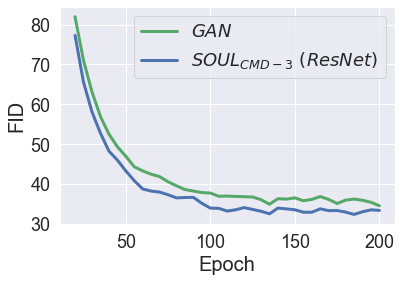

In [7]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '45'), 'fid.txt'))
    n = 5 #1 #10 #11
    print(fids)
    fids = ema(fids, n)
    start = 0 #3#0 #7
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('FID')
plt.xlabel('Epoch')
# plt.xscale('log', base=10)

[2.75302744 3.92539334 4.3566556  4.66124249 4.69539213 5.15302467
 5.11320066 5.06297588 5.23579359 5.09766865 5.29043245 5.32839251
 5.28242016 5.38670731 5.35441303 5.45885277 5.45195675 5.46752787
 5.41489077 5.36198473 5.46209908 5.52850819 5.33522892 5.34300995
 5.42662048 5.49007368 5.64182806 5.63425684 5.37146759 5.36149693
 5.45381641 5.68465853 5.45905542 5.42713356 5.40521622 5.72404432
 5.53768539 5.41150999 5.49200964 5.51483917 5.68169498]
[3.10747457 4.47267056 4.71048594 4.85282993 5.13075209 5.45057917
 5.41215658 5.28328657 5.57892609 5.6428566  5.75178862 5.84603834
 5.71786451 5.77606297 5.5905447  5.7668972  5.85742235 5.58737278
 5.75551462 5.77779579 5.95407343 5.77830076 5.8986311  5.83030415
 5.72100401 5.87414074 5.87368822 5.836658   5.59692097 5.67103958
 5.78698969 5.86539412 5.73129559 5.78900099 5.94300222 5.87130737
 5.82743692 5.9735384  5.7902565  5.8292985  5.83958292]


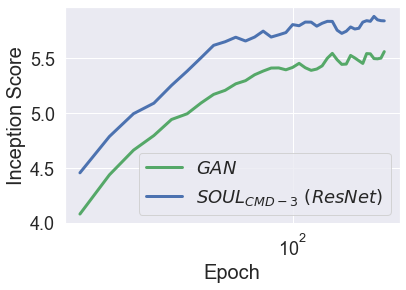

In [8]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '45'), 'inception_score.txt'))
    n = 5 #1 #10 #11
    print(fids)
    fids = ema(fids, n)
    start = 0 #3#0 #7
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('Inception Score')
plt.xlabel('Epoch')
plt.xscale('log', base=10)

In [9]:
seeds = [44, 45, 46]
exp_paths = ['../log/dumb_feature_PriorTarget_train/dcgan_0.01_44', 
'../log/cmd_resnet34_feature_DiscriminatorTarget_train/dcgan_flow_44'
]
names = [r'$GAN$', 
r'$SOUL_{CMD-3} ~(ResNet)$',
]
colors = ['purple', 
'orange']

[154.74739811  81.66639     71.32495113  59.80231905  50.98811685
  50.29050175  48.38318511  45.55311507  44.94137414  41.38207688
  42.22460541  40.81809039  36.28711377  40.53018128  36.99683355
  37.18331279  37.82304455  36.8645722   35.9235376   36.32404915
  35.02501426  35.9887333   35.42506908  36.24622379  33.61184434
  35.22418776  32.11528966  34.14952298  33.84596529  34.92621517
  35.62012179  36.075251    33.7705844   33.4201177   35.56814464
  35.82436876  32.45933151  34.51161836  33.35859764  33.39386075
  33.91404833]
[163.62699966  85.8131952   60.38144497  56.52625827  48.96883575
  48.75934537  47.03631681  45.66923798  46.18220241  42.25342494
  40.31135953  40.37949144  36.82059709  39.39236652  37.02054515
  35.70191216  34.36366108  34.95324966  36.77364267  38.0049487
  38.85289997  33.72566094  36.8844981   35.58223045  31.33713546
  33.96226256  35.35911456  32.13666447  35.28948791  33.34681161
  32.25542916  33.72492927  34.08229675  32.67564183  34.05947

Text(0.5, 0, 'Epoch')

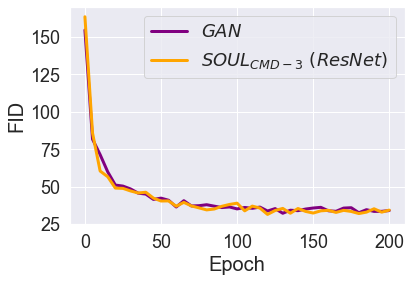

In [10]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '44'), 'fid.txt'))
    n = 1
    print(fids)
    fids = ema(fids, n)
    start = 0
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('FID')
plt.xlabel('Epoch')
# plt.xscale('log', base=10)

[2.87234521 3.98596001 4.44148064 4.57397318 4.88163805 4.91236544
 5.03580284 5.31859255 5.37352419 5.40694475 5.19935608 5.34414673
 5.48569822 5.34032822 5.53108168 5.52949381 5.55942917 5.64075613
 5.47968864 5.56696177 5.56672764 5.47275448 5.52889585 5.4758873
 5.46471262 5.52268648 5.72580194 5.68767071 5.67211533 5.4878912
 5.43729258 5.47976017 5.46033478 5.59823608 5.52014732 5.33587837
 5.64269066 5.49547625 5.44804192 5.69882488 5.53712416]
[2.69595003 4.05420256 4.76100206 4.87775517 5.2921114  5.01506996
 5.32461739 5.20620012 5.40014696 5.34014559 5.42150688 5.69449425
 5.67786217 5.46116924 5.63723516 5.61227751 5.82093859 5.73653221
 5.53707218 5.59986115 5.53699398 5.81701994 5.63343287 5.7475419
 5.97690392 5.97124004 5.85631704 5.84287167 5.63464308 5.86641502
 5.92396307 6.01187086 5.82709789 5.80116367 5.84808683 5.84765911
 6.0490756  5.77915478 5.69712734 5.85047913 5.88742256]


Text(0.5, 0, 'Epoch')

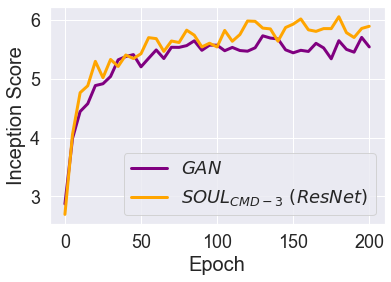

In [11]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '44'), 'inception_score.txt'))
    n = 1 #10 #11
    print(fids)
    fids = ema(fids, n)
    start = 0
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('Inception Score')
plt.xlabel('Epoch')
#plt.xscale('log', base=10)

[150.52626427  75.61591503  68.89197335  56.26846986  58.55444547
  49.1163651   47.39116705  44.64814388  43.70482817  43.00980797
  42.21462907  39.04234811  41.22503819  40.81857991  40.66796727
  37.99359352  37.52772773  36.7620748   37.47945826  37.10477378
  37.47492944  35.3432345   37.06011833  36.73184412  36.67766386
  36.60607641  34.73993461  32.65330339  39.10749802  35.98070511
  37.19106128  34.38246271  36.77105735  38.34175778  34.66949038
  33.08357419  37.64796009  36.7707664   35.30206165  34.45867227
  32.78126392]
[149.44678999  63.89080702  58.83042449  53.28039482  48.98481515
  45.0795087   45.82843251  43.19988841  40.56663063  38.47278021
  41.21954548  38.44771678  39.27456537  37.08833515  37.42711178
  35.059443    36.86585438  37.05045201  36.09754212  35.32010332
  37.06490773  36.49160616  33.74158137  34.43221326  34.64894193
  33.98113413  36.05828869  34.73792275  33.41640136  33.22060798
  33.25178406  34.64205206  34.65623496  33.4928749   34.2247

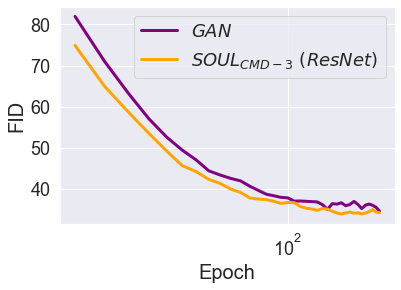

In [12]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '45'), 'fid.txt'))
    n = 5
    print(fids)
    fids = ema(fids, n)
    start = 0
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('FID')
plt.xlabel('Epoch')
plt.xscale('log', base=10)

[2.75302744 3.92539334 4.3566556  4.66124249 4.69539213 5.15302467
 5.11320066 5.06297588 5.23579359 5.09766865 5.29043245 5.32839251
 5.28242016 5.38670731 5.35441303 5.45885277 5.45195675 5.46752787
 5.41489077 5.36198473 5.46209908 5.52850819 5.33522892 5.34300995
 5.42662048 5.49007368 5.64182806 5.63425684 5.37146759 5.36149693
 5.45381641 5.68465853 5.45905542 5.42713356 5.40521622 5.72404432
 5.53768539 5.41150999 5.49200964 5.51483917 5.68169498]
[2.96107697 4.57478523 4.74096298 4.84473944 4.88420439 5.35005999
 5.4576993  5.29645061 5.44756365 5.55007982 5.31062937 5.70703745
 5.43340492 5.58767319 5.52818203 5.53456211 5.62562275 5.61538506
 5.50418234 5.67123461 5.83455801 5.67410088 5.66410208 5.7797823
 5.60090685 5.80799198 5.85284424 5.7579608  5.93693495 5.71289682
 5.72391367 5.58163166 5.71594048 5.64603806 5.73392677 5.67994308
 5.75472736 5.70788527 5.74466562 5.69281054 5.73396015]


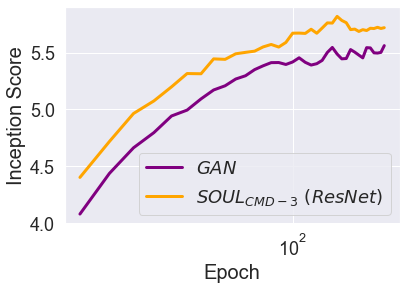

In [13]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '45'), 'inception_score.txt'))
    n = 5
    print(fids)
    fids = ema(fids, n)
    start = 0
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('Inception Score')
plt.xlabel('Epoch')
plt.xscale('log', base=10)

In [14]:
seeds = [44, 45, 46]
exp_paths = ['../log/dumb_feature_PriorTarget_train/dcgan_0.01_44', 
'../log/cmd_resnet34_feature_PriorTarget_train/dcgan_flow1_44'
]
names = [r'$GAN$', 
r'$SOUL_{CMD-3} ~(ResNet)$',
]
colors = ['purple', 
'orange']


[205.6485584   76.05553317  67.50316094  53.41512266  47.61844269
  47.7196207   44.24519494  42.319656    45.27197299  40.0696615
  38.18086911  38.21671501  39.120595    39.92708776  36.92833733
  37.71319686  39.27149678  37.01203736  36.62644692  38.58923107
  36.01681755  34.88285029  37.71301751  35.94226784  36.18685488
  34.25326118  38.07271164  36.71475763  34.89924442  34.71815425
  33.32437524  35.27415049  38.79992189  35.16358712  34.53584265
  33.92015576  33.70777115  33.78876077  35.27291193  34.64993856
  33.47989855]
[142.90584501  75.48340266  61.83104605  58.53897319  47.39932266
  48.80205947  44.97898494  42.45685267  39.73369493  41.76337682
  43.63699084  38.6337935   37.65448036  36.98641468  37.07848732
  38.64046674  38.16572905  34.11500268  36.13104461  33.68179394
  32.41889015  33.65310907  35.95413288  34.06876309  30.76020824
  33.13410112  33.63398782  32.95164262  34.29766402  32.26451873
  35.41096248  31.18229728  33.29797772  31.78952559  33.06761

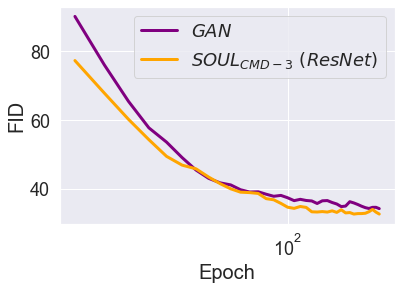

In [15]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '46'), 'fid.txt'))
    n = 5
    print(fids)
    fids = ema(fids, n)
    start = 0
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('FID')
plt.xlabel('Epoch')
plt.xscale('log', base=10)

[2.66777158 3.80961704 4.19847155 4.65006542 5.1136837  5.14072943
 4.99239731 5.27838326 5.00438404 5.31327581 5.34116888 5.45096111
 5.36147451 5.37182808 5.36914968 5.56595516 5.40998125 5.54068375
 5.53417921 5.44184446 5.54740191 5.68200922 5.46256876 5.37028646
 5.49103117 5.67777491 5.44694471 5.60249758 5.59260798 5.62589979
 5.68637323 5.68818283 5.36070204 5.4606638  5.45469093 5.62300396
 5.68480396 5.57371759 5.53371048 5.62203217 5.54382849]
[3.27507591 3.97773767 4.61634827 5.05588388 5.27914524 5.31887531
 5.09733248 5.4212904  5.64147425 5.49797106 5.51215172 5.63120365
 5.62761736 5.84158134 5.71780825 5.59674454 5.62260437 5.69364452
 5.76194    5.83923721 5.79440212 5.89859104 5.85554266 5.84044838
 5.92727804 5.88878918 6.05511618 5.7918334  5.96207619 5.82605505
 5.74383497 5.98629379 5.64249754 6.00950146 5.97367239 5.92858744
 5.95616007 5.89162397 5.74788523 6.12000132 6.27596283]


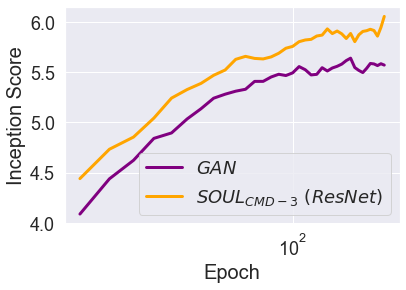

In [16]:
for name, color, path in zip(names, colors, exp_paths):
    fids = np.loadtxt(Path(path.replace('44', '46'), 'inception_score.txt'))
    n = 5 #10 #11
    print(fids)
    fids = ema(fids, n)
    start = 0 #3#0 #7
    fids = fids[start:]
    plt.plot(np.arange((start+n-1)*5, (len(fids)+(start+n-1))*5, 5), fids, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('Inception Score')
plt.xlabel('Epoch')
plt.xscale('log', base=10)

In [17]:
exp_paths = dict()
exp_paths[r'Vanilla'] = [f'../log/dumb_feature_PriorTarget_train/dcgan_0.01_{seed}' for seed in [44, 45, 46]]
exp_paths[r'ME-Flow$_{CMD-3} ~$(ResNet)'] = [f'../log/cmd_resnet34_feature_PriorTarget_train/dcgan_flow_{seed}' for seed in [44, 45]] + \
    [f'../log/cmd_resnet34_feature_PriorTarget_train/dcgan_flow1_46']
colors = [
    'purple', 
    'orange'
    ]

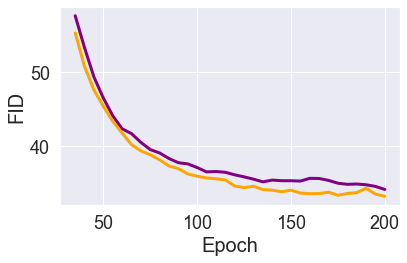

In [18]:
import matplotlib 

fig, ax = plt.subplots()#figsize=(6, 4))
for color, (name, paths) in zip(colors, exp_paths.items()):
    ms = []
    for path in paths:
        m = np.loadtxt(Path(path, 'fid.txt'))
        n = 5
        m = ema(m, n)
        start = 3
        m = m[start:]
        ms.append(m)
    ms = np.mean(np.stack(ms, 0), 0)
    stds = np.std(np.stack(ms, 0), 0)
    line = ax.plot(np.arange((start+n-1)*5, (len(ms)+(start+n-1))*5, 5), ms, label=name, color=color)#, marker='o')
    #plt.fill_between(np.arange((start+n-1)*5, (len(ms)+(start+n-1))*5, 5), ms-1.96*stds, ms+1.96*stds, label=name, color=line[0].get_color(), alpha=0.2)#, marker='o')
    
# plt.legend()
ax.set_ylabel('FID')
ax.set_xlabel('Epoch')
# ax.set_xscale('log', base=10)
# ax.set_xticks([30, 50, 100, 200])
# ax.set_xticklabels([30, 50, 100, 200])
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.get_xaxis().get_major_formatter().labelOnlyBase = False
fig.tight_layout()
plt.savefig('../log/dcgan_train_fid.pdf')

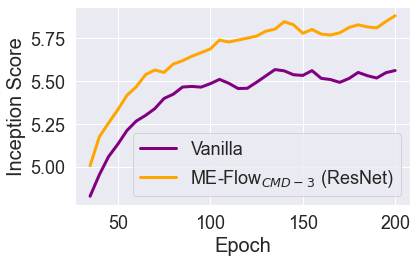

In [19]:
fig, ax = plt.subplots()#figsize=(6, 4))

for color, (name, paths) in zip(colors, exp_paths.items()):
    ms = []
    for path in paths:
        m = np.loadtxt(Path(path, 'inception_score.txt'))
        n = 5
        m = ema(m, n)
        start = 3
        m = m[start:]
        ms.append(m)
    ms = np.mean(np.stack(ms, 0), 0)
    stds = np.std(np.stack(ms, 0), 0)
    line = plt.plot(np.arange((start+n-1)*5, (len(ms)+(start+n-1))*5, 5), ms, label=name, color=color)#, marker='o')
    #plt.fill_between(np.arange((start+n-1)*5, (len(ms)+(start+n-1))*5, 5), ms-1.96*stds, ms+1.96*stds, label=name, color=line[0].get_color(), alpha=0.2)
    
plt.legend()
plt.ylabel('Inception Score')
plt.xlabel('Epoch')
# plt.xscale('log', base=10)
fig.tight_layout()
plt.savefig('../log/dcgan_train_is.pdf')

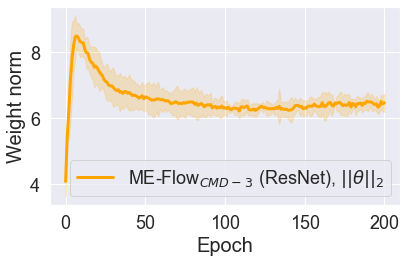

In [30]:
fig, ax = plt.subplots()#figsize=(6, 4))

for color, (name, paths) in zip(colors[1:], list(exp_paths.items())[1:]):
    ms = []
    for path in paths[:1] + paths[2:3]:
        m = np.loadtxt(Path(path, 'weight_norm.txt'))
        n = 1 #20
        m = ema(m, n)
        start = 0
        m = m[start:]
        ms.append(m)
    means = np.mean(np.stack(ms, 0), 0)
    stds = np.std(np.stack(ms, 0), 0)
    line = plt.plot(np.arange((start+n-1), (len(means)+(start+n-1))), means, label=fr'{name}, $||\theta||_2$', color=color)#, marker='o')
    plt.fill_between(np.arange((start+n-1), (len(means)+(start+n-1))), means-1.96*stds, means+1.96*stds, color=line[0].get_color(), alpha=0.2)
    
plt.legend()
plt.ylabel('Weight norm')
plt.xlabel('Epoch')
# plt.xscale('log', base=10)
fig.tight_layout()
plt.savefig('../log/dcgan_train_weight.pdf')